In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Objective

To explore data and stablish a binning analysis on the continouos variables from the TARA Chile expedition.

## Read metadata file

In [2]:
metadata = pd.read_csv('metadata_chile.tsv', sep='\t', index_col=0)
metadata.head()

,SAMEA ID,Leg,Station,Station ID,Depth ID,lat_cast,lon_cast,datetime,Depth [m],Temperature [ºC],...,day,hour,minute,second,instrument,original file,Depth level,Oxygen level,Biogeographical units,Freshwater inputs
Samples,,,,,,,,,,,,,,,,,,,,,
S01_Z00,SAMEA7920473,1,1,MMC-001,Z0,-50.898333,-74.278333,2/20/2021 10:24,2,11.272,...,20,10,24,52,sbe17plusV2,cast 011000.cnv,SRF,OXIC,PFR,YES
S01_Z01,SAMEA7920507,1,1,MMC-001,Z1,-50.898333,-74.278333,2/20/2021 10:24,20,10.569,...,20,10,24,52,sbe17plusV2,cast 011000.cnv,EPI,OXIC,PFR,YES
S01_Z05,SAMEA7920503,1,1,MMC-001,Z5,-50.898333,-74.278333,2/20/2021 10:24,90,9.060,...,20,10,24,52,sbe17plusV2,cast 011000.cnv,EPI,OXIC,PFR,NO
S02_Z00,SAMEA7920664,1,2,MMC-002,Z0,-50.701667,-74.573333,2/22/2021 10:12,2,11.465,...,22,10,12,1,sbe17plusV2,cast 015000.cnv,SRF,OXIC,PFR,YES
S02_Z01,SAMEA7920687,1,2,MMC-002,Z1,-50.701667,-74.573333,2/22/2021 10:12,10,11.426,...,22,10,12,1,sbe17plusV2,cast 015000.cnv,EPI,OXIC,PFR,YES


## Explore useful environmental variables

In [3]:
print('Columns of the metadata table:\n', metadata.columns)

vars_to_drop = [
    'Station', 'Station ID', 'Depth ID', 'datetime', 'year', 'month', 
    'day', 'hour', 'minute', 'second', 'instrument', 'original file'
]

vars_cont = ['Depth [m]', 'Temperature [ºC]', 'Salinity [PSU]',
             'Density [kg/m3]','Oxygen [ml/l]', 'Oxygen [%]', 'Fluorescence [mg/m3]',
             'Orthophosphate [uM]', 'Silicic acid [uM]', 'Nitrite [uM]','Nitrates [uM]',
             'Nitrate [uM]', 'N/P ratio'
]

md = metadata.drop(columns=vars_to_drop)
md_cont = md[vars_cont]

Columns of the metadata table:
 Index(['SAMEA ID', 'Leg', 'Station', 'Station ID', 'Depth ID', 'lat_cast',
       'lon_cast', 'datetime', 'Depth [m]', 'Temperature [ºC]',
       'Salinity [PSU]', 'Density [kg/m3]', 'Oxygen [ml/l]', 'Oxygen [%]',
       'Fluorescence [mg/m3]', 'Orthophosphate [uM]', 'Silicic acid [uM]',
       'Nitrite [uM]', 'Nitrates [uM]', 'Nitrate [uM]', 'N/P ratio', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'instrument',
       'original file', 'Depth level', 'Oxygen level', 'Biogeographical units',
       'Freshwater inputs'],
      dtype='object')


These are the variables we will work with:

- Depth [m]
- Temperature [ºC]
- Salinity [PSU]
- Density [kg/m3]
- Oxygen [ml/l]
- Oxygen [%]
- Fluorescence [mg/m3]
- Orthophosphate [uM]
- Silicic acid [uM]
- Nitrite [uM]
- Nitrates [uM]
- Nitrate [uM]
- N/P ratio
- lon_cast (Longitude)
- lat_cast (Latitude)
- Depth level
- Oxygen level
- Biogeographical units
- Freshwater inputs

# EDA

In [4]:
# Folder to save results
out = '../../03_results/out_eda'

In [5]:
print('NaN values exploration:\n', md[vars_cont].isna().sum())
print('\n')
print('Description of the data:\n', md[vars_cont].describe())

NaN values exploration:
 Depth [m]               0
Temperature [ºC]        0
Salinity [PSU]          0
Density [kg/m3]         0
Oxygen [ml/l]           0
Oxygen [%]              0
Fluorescence [mg/m3]    0
Orthophosphate [uM]     0
Silicic acid [uM]       0
Nitrite [uM]            0
Nitrates [uM]           0
Nitrate [uM]            0
N/P ratio               0
dtype: int64


Description of the data:
         Depth [m]  Temperature [ºC]  Salinity [PSU]  Density [kg/m3]  \
count  159.000000        159.000000      159.000000       159.000000   
mean   112.283019         11.741051       32.735075      1025.357250   
std    154.781722          3.134264        5.226391         4.388282   
min      1.000000          5.081000        1.770000      1001.039000   
25%     20.000000         10.057500       33.540000      1025.229500   
50%     50.000000         11.426000       34.280000      1026.122100   
75%    150.000000         13.375000       34.520000      1027.057000   
max    600.000000   

## Explore location of the data

In this section, we will explore the geospatial locations of sampling

In [6]:
import folium

m = folium.Map(location=[md['lat_cast'].mean(), md['lon_cast'].mean()], zoom_start=4)

for idx, row in md.iterrows():
    folium.Marker([row['lat_cast'], row['lon_cast']], tooltip=f'Index: {idx}').add_to(m)

m

## Explore distirbutions

In this section, we will explore the distribution of the selected continuous environmental variables from the TARA Chile expedition dataset. We will use histograms and box plots to visualize the distributions

### Histograms

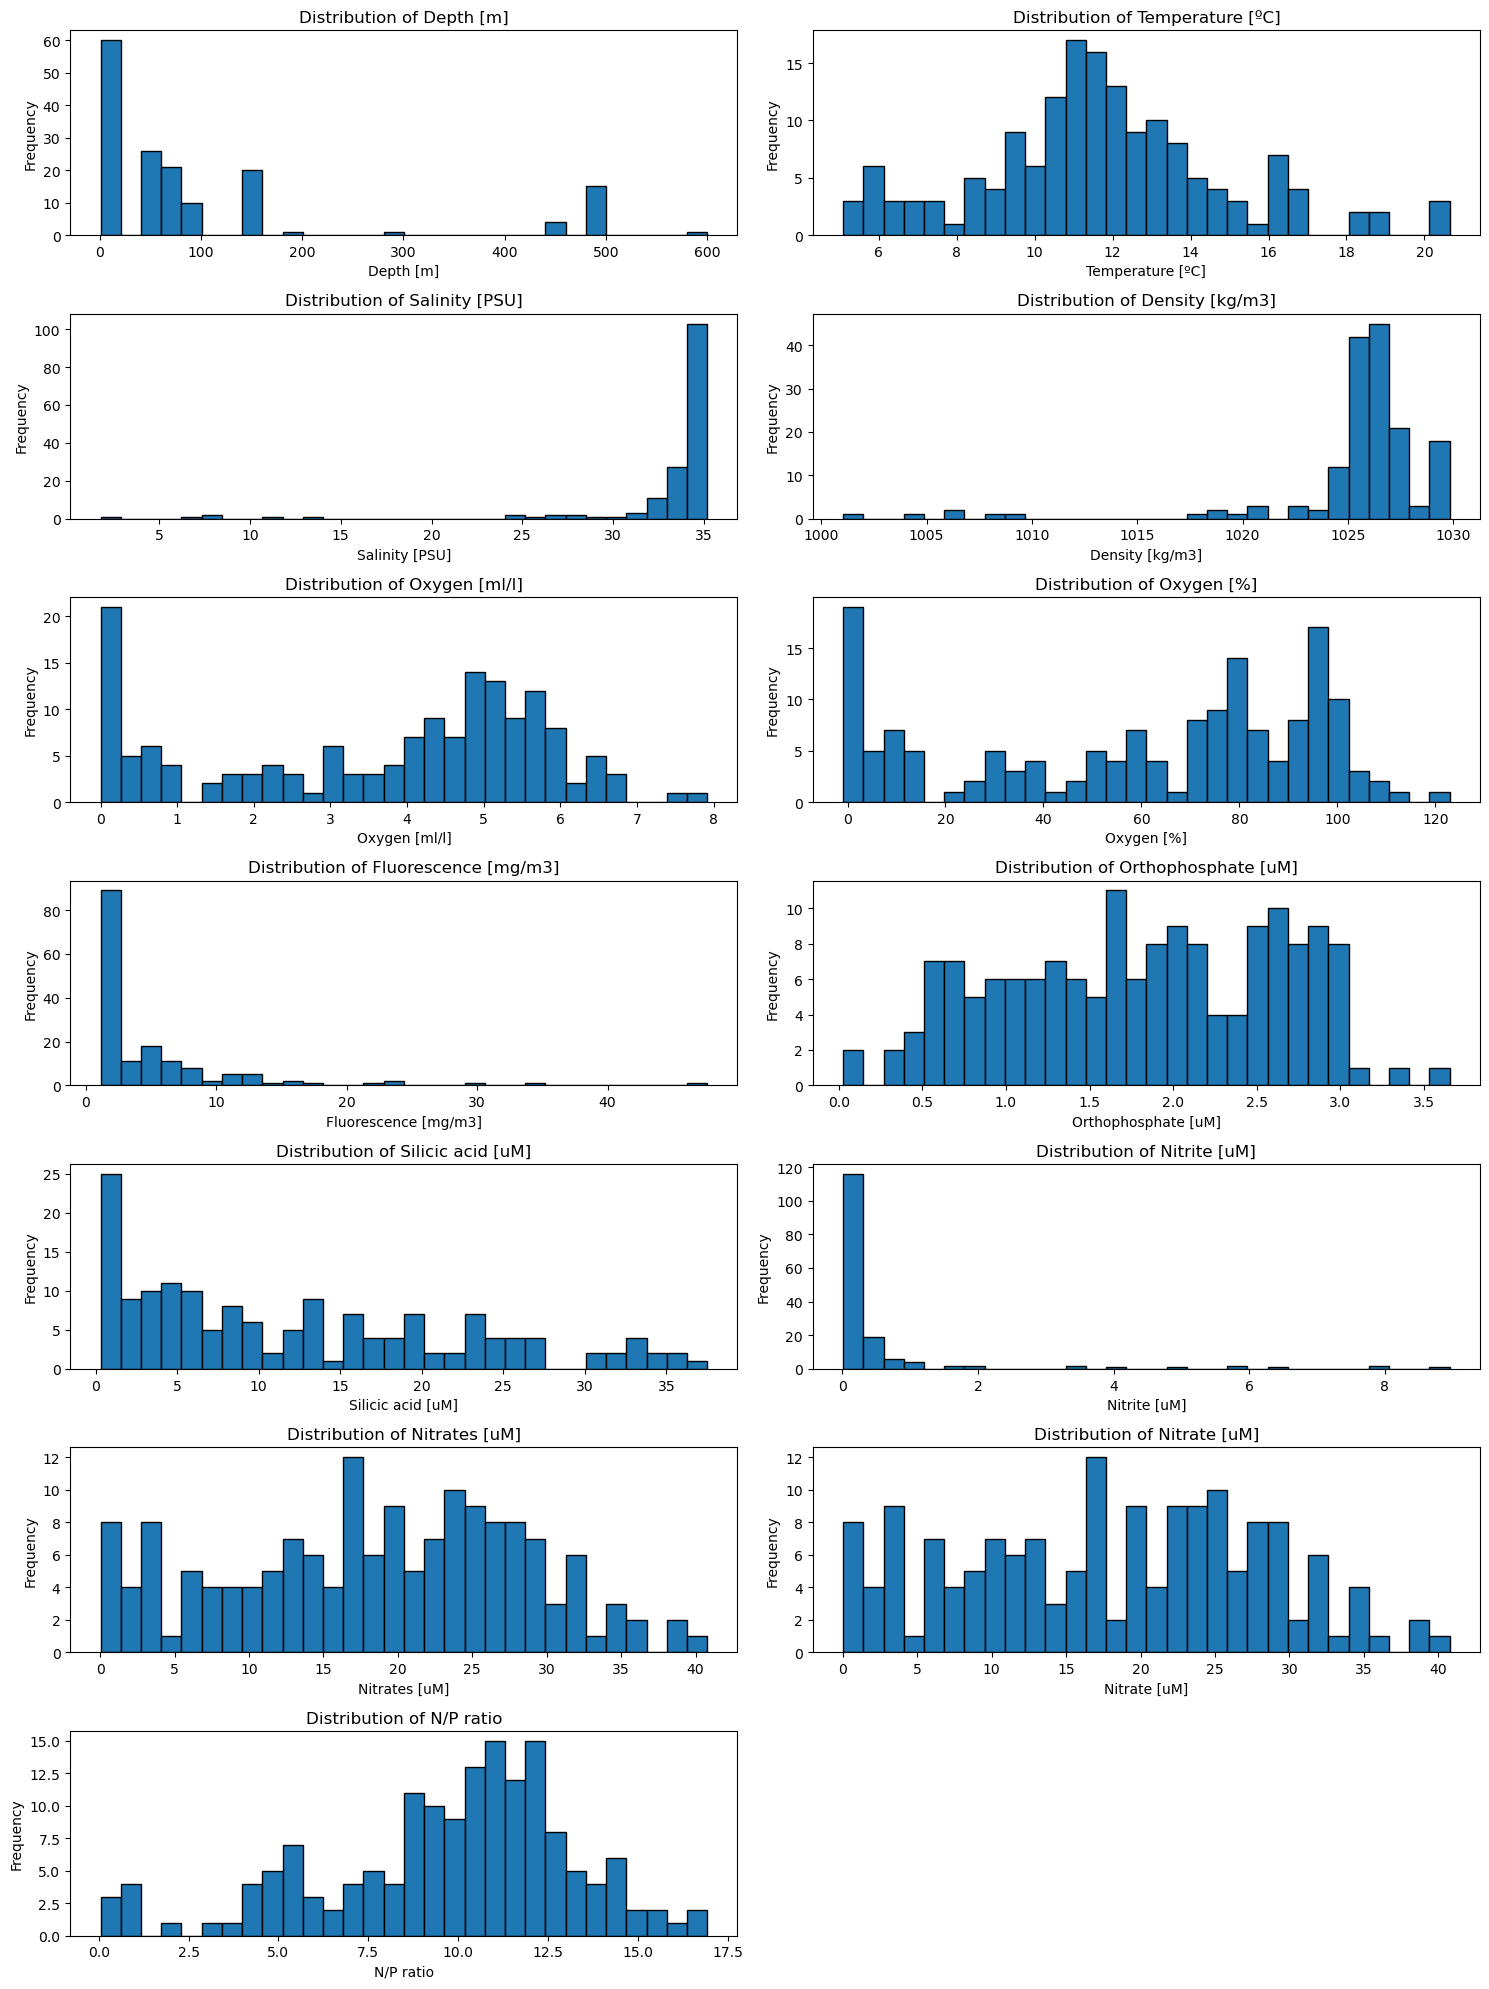

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each variable
plt.figure(figsize=(15, 20))
for i, var in enumerate(vars_cont):
    plt.subplot(7, 2, i + 1)
    plt.hist(md[var].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.savefig(f'{out}/histograms.pdf', bbox_inches='tight')
plt.show()

### Box plots

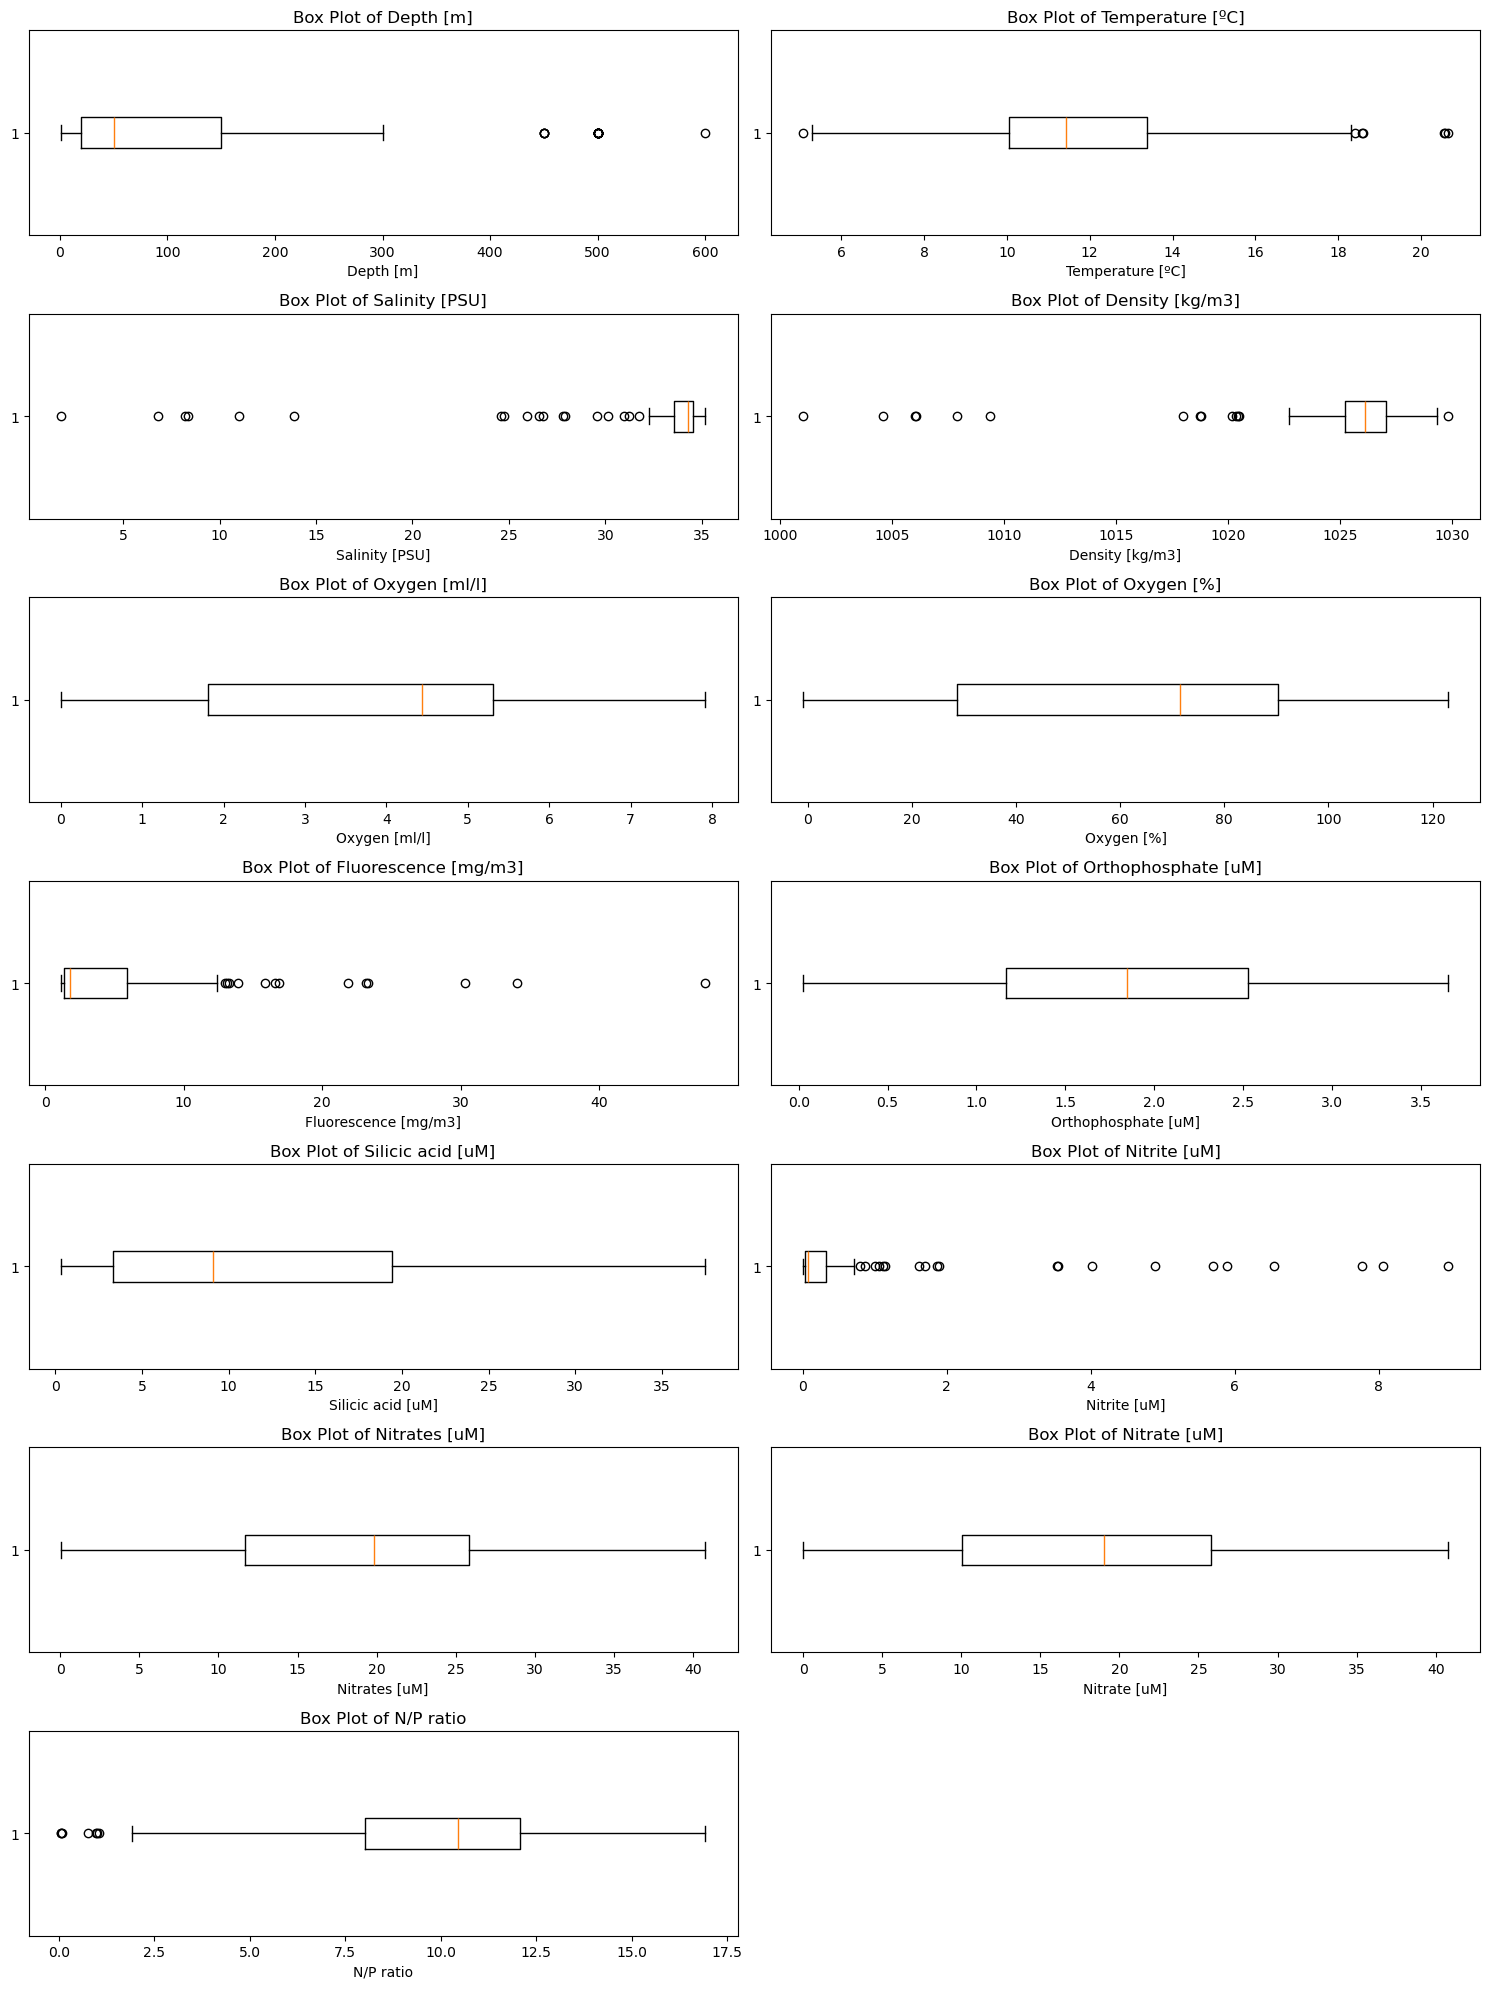

In [8]:
# Plot box plots for each variable
plt.figure(figsize=(15, 20))
for i, var in enumerate(vars_cont):
    plt.subplot(7, 2, i + 1)
    plt.boxplot(md[var].dropna(), vert=False)
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.savefig(f'{out}/boxplots.pdf', bbox_inches='tight')
plt.show()

### Pairplot

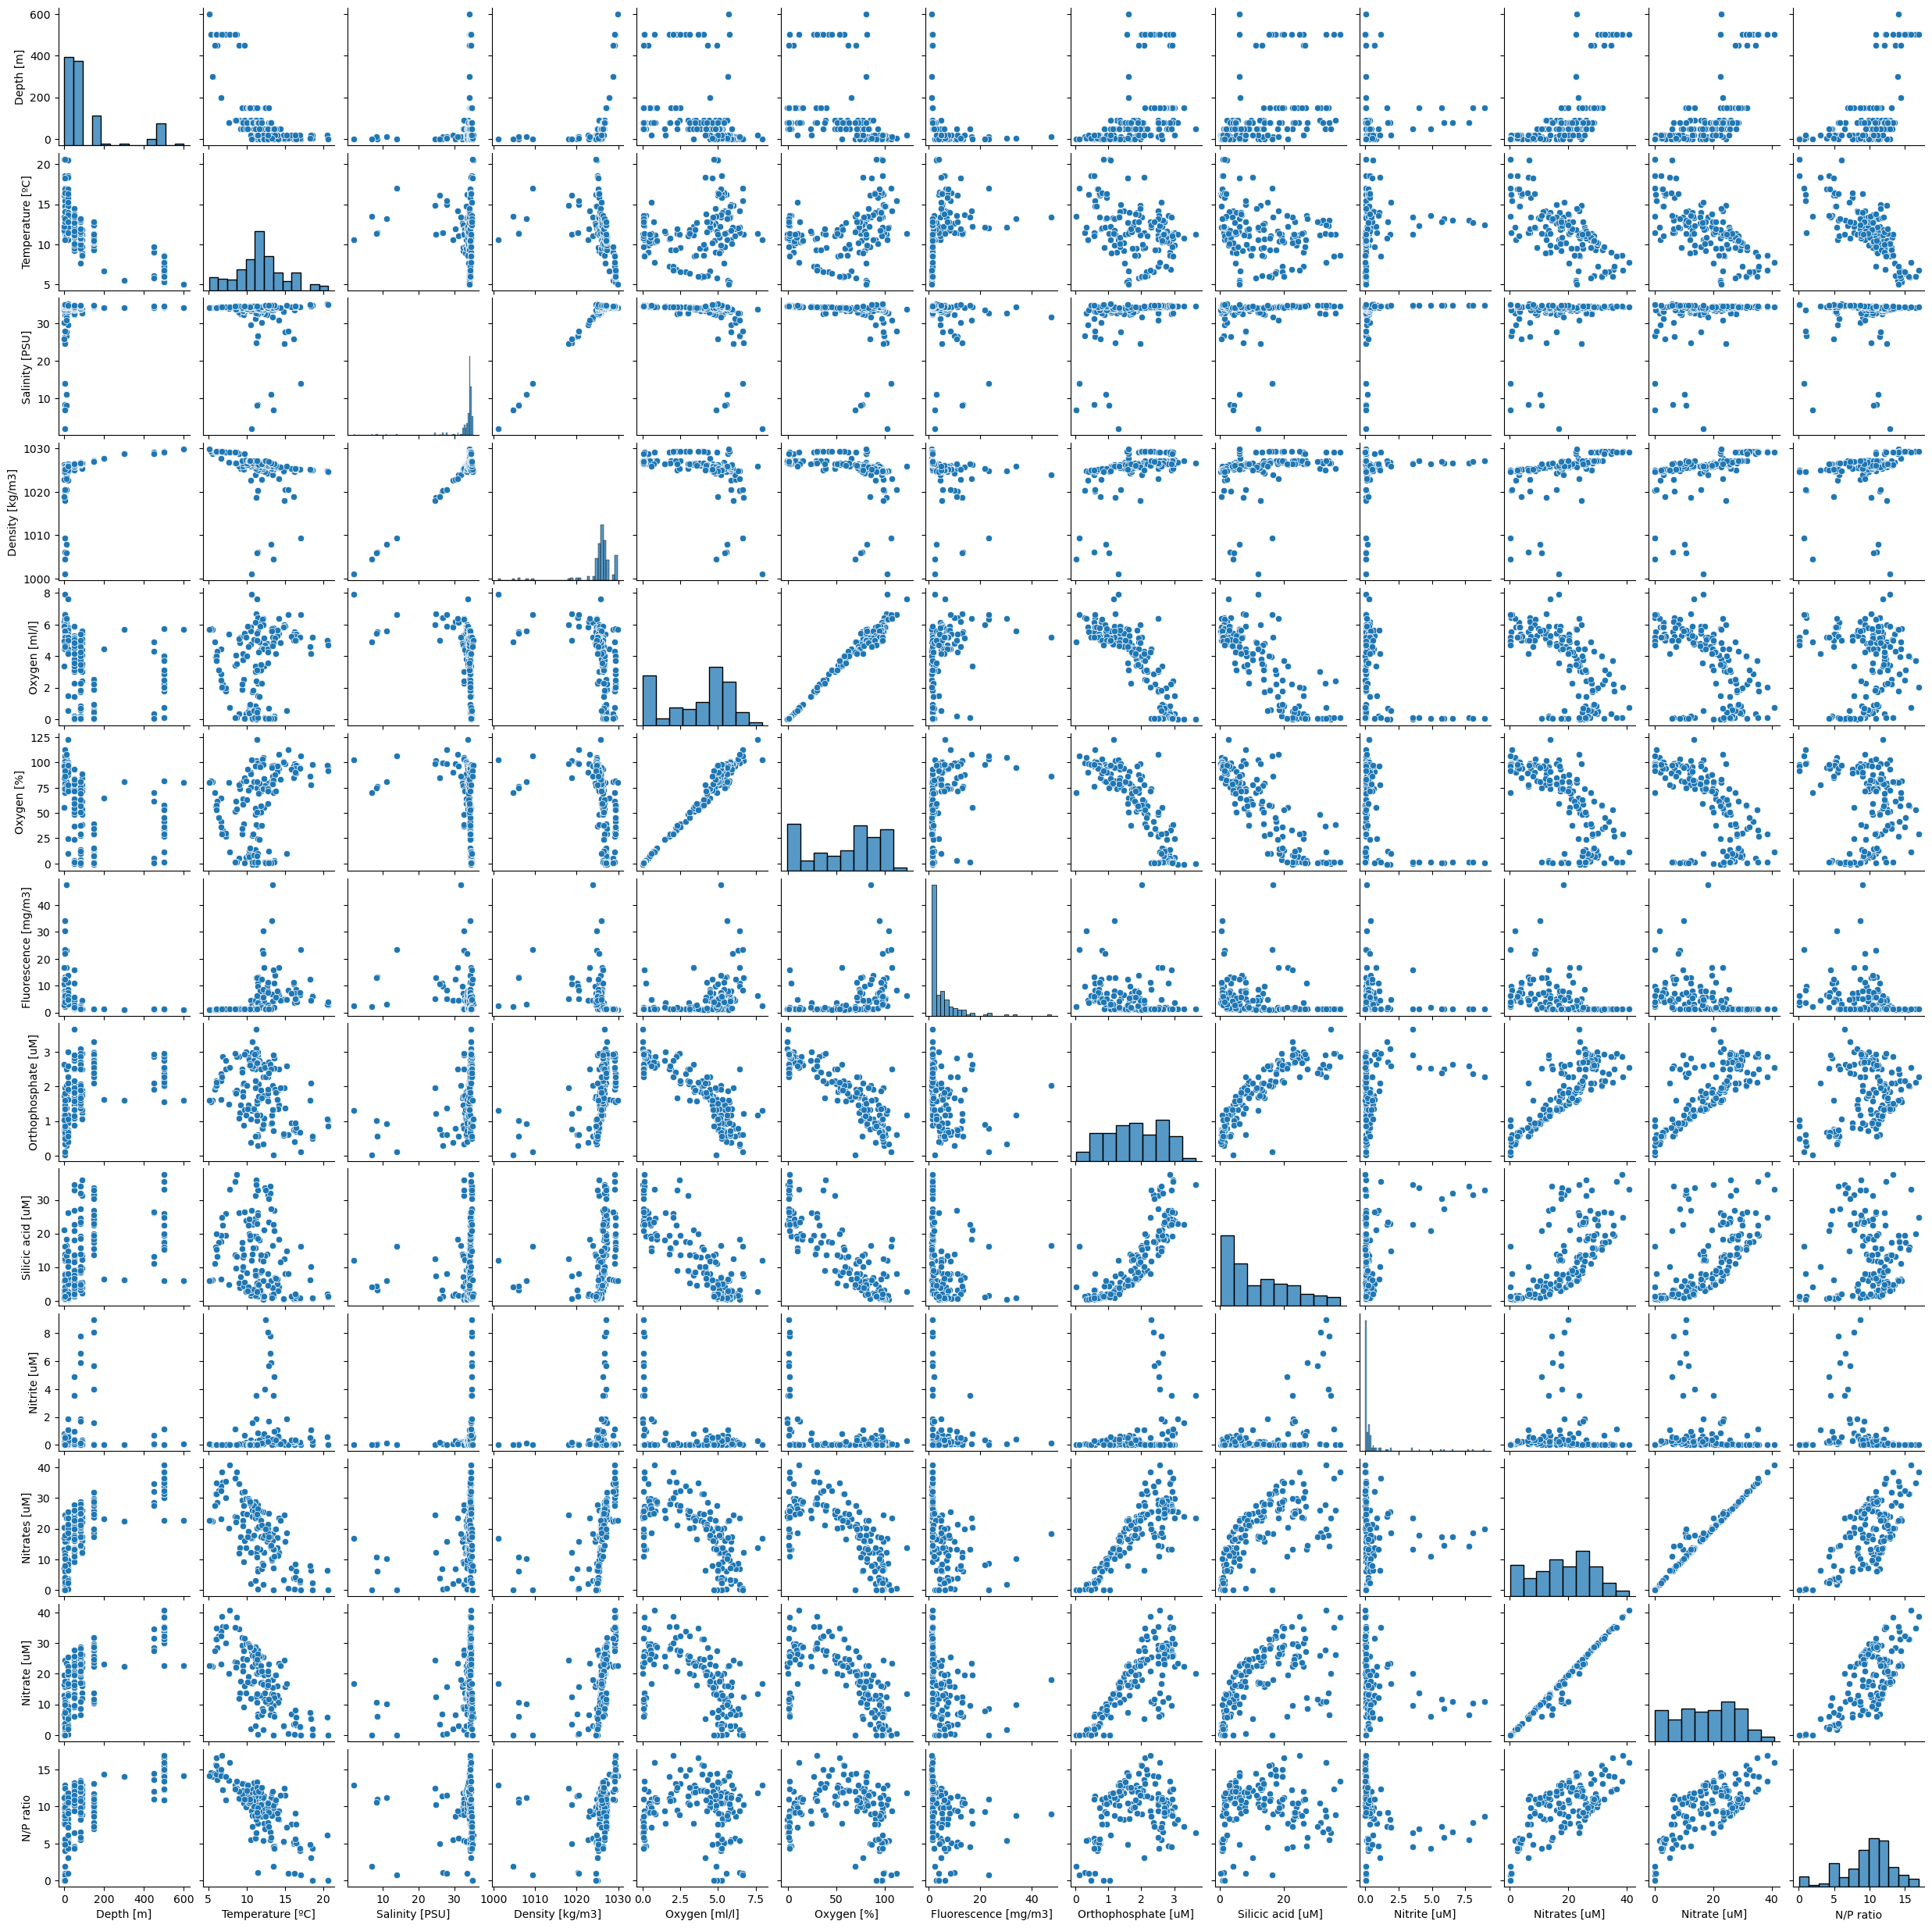

In [9]:
# Pair plot de variables continuas

pairplot_fig = sns.pairplot(md[vars_cont], height=2.5)
pairplot_fig.fig.set_size_inches(25, 25)
plt.savefig(f'{out}/pairplot.pdf', bbox_inches='tight')
plt.show()

# Binning analysis

## Temperature

In [10]:
print('NaN values:', md['Temperature [ºC]'].isna().sum())
sorted = np.sort(md['Temperature [ºC]'])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted, '-o')

a=8
b=16

# Manual bins
plt.axhline(y=a, color='g', linestyle='--')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted < a)
bin2_count = np.sum((sorted >= a) & (sorted < b))
bin3_count = np.sum(sorted >= b)
# Text for manual bins
plt.text(len(sorted) * 0.1, b+2, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted) * 0.1, (b+a)/2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted) * 0.1, a-2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

plt.legend()
plt.show()

NaN values: 0


NameError: name 'np' is not defined